# Se desea encontrar el máximo de la función

$$f\left(x,y\right) = \sqrt{x^2+y^2}$$

en el dominio { x, y } ∈ [-100, 100]



In [1]:
from time import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from seaborn import cm

from deap import base, creator, tools, algorithms

## Población aleatoria

In [2]:
random.seed(0)
np.random.seed(0)

x = [random.uniform(-100, 100) for _ in range(10)]
y = [random.uniform(-100, 100) for _ in range(10)]

x_np = np.random.uniform(-100, 100, 10).reshape(1, 10)
y_np = np.random.uniform(-100, 100, 10).reshape(1, 10)


# Grafica de la función

In [3]:
# Fitness funtion
sample_f = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def plot():
    # Vectores de todo el dominio
    x = np.linspace(-100, 100, 1000)
    y = np.linspace(-100, 100, 1000)

    # Evaluación de variables
    x_ax, y_ax = np.meshgrid(x, y)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([sample_f(val) for val in vals], (1000, 1000))

    # Plot
    figure_3d = plt.figure(figsize=(8,15))
    ax = figure_3d.gca(projection="3d")
    ax.plot_surface(x_ax, y_ax, fx, cmap = cm.rocket)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")


<ipython-input-3-98e27034b512>:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure_3d.gca(projection="3d")


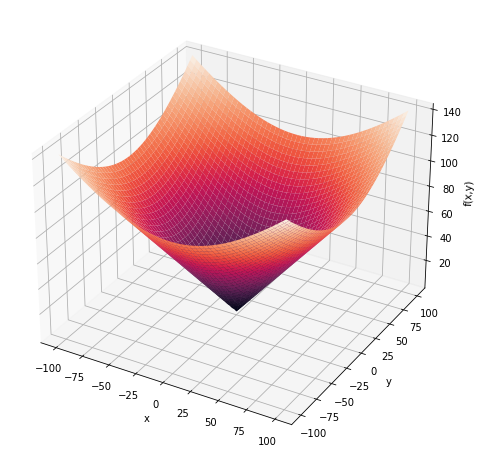

In [4]:
plot()

# Definición del problema y generación de la población inicial

In [5]:
# Constantes
NUM_INDIVIDUOS = 50
MUM_GENERACIONES = 20

In [6]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

# Generación de individuos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, NUM_INDIVIDUOS)

individuo = toolbox.individual()
poblacion = toolbox.population()

In [7]:
toolbox.attr_uniform()

-25.972011932962502

In [8]:
# Generación de individuo
toolbox.individual()

[96.10333012945372, -92.72159247770284]

In [9]:
# Atributo fitness de un objeto recien creado
individuo.fitness.values

()

In [10]:
poblacion[0]

[79.7676575935987, 36.79678638308826]

# Función objetivo y operadores genéticos

In [11]:
def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    return math.sqrt(x[0]**2 + x[1]**2),

In [12]:
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [13]:
toolbox.evaluate(individuo), toolbox.evaluate([100.00000001, 12.545454])

((59.6209956118362,), (-1,))

![Picture title](../images/image-20220118-230255.png)

# Últimos pasos: Algoritmo genético como caja negra

In [14]:
def main():
    # random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, MUM_GENERACIONES
    pop = toolbox.population()
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(
        pop,
        toolbox,
        cxpb=CXPB,
        mutpb=MUTPB,
        ngen=NGEN,
        stats=stats,
        halloffame=hof,
        verbose=True
    )
    return hof, logbook

In [15]:
def plot_evolution(log):
    """Representa la evolución del mejor individuo en cada generación"""
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_avg, "--k")
    ax1.fill_between(gen , fit_mins , fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend (["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)

gen	nevals	avg    	std    	min    	max    
0  	50    	73.5141	30.3915	6.07435	132.873
1  	29    	99.5076	24.1764	34.5889	134.302
2  	36    	122.435	12.5574	87.4557	138.175
3  	39    	130.788	5.96128	111.016	139.456
4  	29    	134.839	2.84186	128.697	141.124
5  	25    	137.217	2.16891	132.614	141.124
6  	28    	136.013	19.661 	-1     	141.124
7  	32    	134.359	27.6484	-1     	141.124
8  	33    	140.764	0.677274	139.456	141.124
9  	26    	135.439	27.8505 	-1     	141.124
10 	22    	135.439	27.8505 	-1     	141.124
11 	28    	138.224	19.8911 	-1     	141.124
12 	32    	135.377	27.8412 	-1     	141.124
13 	34    	141.044	0.56269 	137.105	141.124
14 	22    	138.281	19.8973 	-1     	141.124
15 	23    	138.281	19.8973 	-1     	141.124
16 	23    	135.439	27.8505 	-1     	141.124
17 	32    	138.25 	19.8936 	-1     	141.124
18 	29    	135.303	27.8273 	-1     	141.124
19 	36    	141.06 	0.447602	137.927	141.124
20 	25    	138.281	19.8973 	-1     	141.124
Mejor fitness: (141.12388838662855,)
Mejo

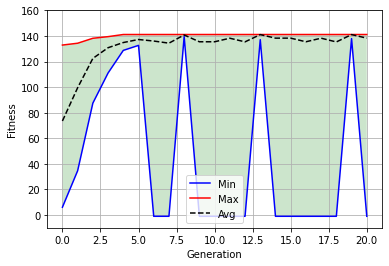

In [16]:
if __name__ == "__main__":
    best, log = main()
    print(f"Mejor fitness: {best[0].fitness.values}")
    print(f"Mejor individuo = {best[0]}")
    plot_evolution(log)

# ¿Cómo conseguir resultados consistentes?

* Aumentar la población hasta que no veamos mejoras significativas. Podemos probar con pocas generacio-nes e ir aumentando el número de individuos.

* Aumentar el número de generaciones y comprobar que el algoritmo converja. Para ello, lo ideal es mostraruna gráfica de convergencia del algoritmo.

* Hacer un barrido de valores de probabilidades de cruce y mutación, y mostrar algunas estadísticas paraver de qué manera afectan dichas probabilidades

# Validación de configuraciones

In [17]:
t0 = time()
random.seed(42)
mejores = [
    main()[0][0].fitness.values
    for _ in range(20)
]
print(mejores)
media = np.mean(mejores)
mejor_total =max(mejores)
print(f"Media: {media}")
print(f"Mejor: {mejor_total}")
print(f"Tiempo: {round(time() - t0, 2)}s")
print(f"N° Evaluaciones: {NUM_INDIVIDUOS * MUM_GENERACIONES}")

gen	nevals	avg    	std    	min    	max    
0  	50    	79.5138	24.5664	26.4289	122.059
1  	28    	97.8301	18.6489	48.4558	130.873
2  	28    	115.187	13.6357	83.2838	140.132
3  	40    	124.553	19.4919	-1     	136.574
4  	27    	133.61 	3.47646	119.014	140.132
5  	37    	135.631	2.05285	130.873	140.132
6  	30    	134.284	19.451 	-1     	140.132
7  	29    	135.773	19.6169	-1     	140.132
8  	34    	137.125	19.7385	-1     	140.132
9  	30    	140.118	0.191669	138.887	140.677
10 	28    	140.138	0.309691	138.232	140.677
11 	30    	140.176	0.147685	140.132	140.677
12 	27    	140.263	0.232492	140.132	140.677
13 	32    	137.339	19.7939 	-1     	140.677
14 	29    	140.545	0.26766 	139.41 	140.677
15 	28    	140.668	0.0591235	140.254	140.677
16 	29    	137.843	19.8347  	-1     	140.677
17 	31    	140.561	0.810355 	134.888	140.677
18 	28    	140.514	0.830834 	135.436	140.677
19 	34    	140.677	0        	140.677	140.677
20 	25    	137.843	19.8347  	-1     	140.677
gen	nevals	avg    	std    	min   	ma

In [18]:
"""
Resultados:
N° Individuos    Valor Medio    Máximo    N° Evaluaciones    Tiempo
    10             132.81       140.51          200           0.41s
    30             139.00       141.28          600           0.75s
    50             140.54       141.34         1000           1.12s
    100            141.95       141.36         2000           2.18s
    1000           141.37       141.41        20000          19.69s
"""

'\nResultados:\nN° Individuos    Valor Medio    Máximo    N° Evaluaciones    Tiempo\n    10             132.81       140.51          200           0.41s\n    30             139.00       141.28          600           0.75s\n    50             140.54       141.34         1000           1.12s\n    100            141.95       141.36         2000           2.18s\n    1000           141.37       141.41        20000          19.69s\n'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e519ef70-0417-4f93-b18c-a7992756a932' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>